In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv",thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', delimiter='\t',  encoding='Latin1', na_values="n/a")

In [3]:
#oecd_bli.head(2)

In [4]:
#oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
#oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values = "Value")

In [5]:
#oecd_bli.head(2)

In [6]:
#gdp_per_capita

In [7]:
#gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
#gdp_per_capita.set_index("Country", inplace=True)

In [8]:
#gdp_per_capita.head(2)

In [9]:
#full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
#full_country_stats.sort_values(by="GDP per capita", inplace=True)

In [10]:
#full_country_stats

In [11]:
#remove_indices = [0, 1, 6, 8, 33, 34, 35]
#keep_indices = list(set(range(36)) - set(remove_indices))

In [12]:
#full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [13]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
  

In [14]:
# prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [15]:
country_stats.head(2)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6


In [16]:
X.shape, y.shape, X.dtype

((29, 1), (29, 1), dtype('float64'))

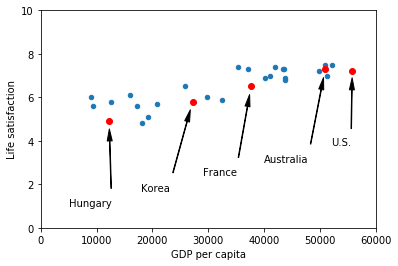

In [17]:
# Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
position_test = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

for country, pos_text in position_test.items():
    pos_data_x, pos_data_y = country_stats.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

In [18]:
# Select linear regression model
lin_reg_model = sklearn.linear_model.LinearRegression()

In [19]:
# Train the model
lin_reg_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# make a prediction
X_new = [[22587]] # Cyrus's GDP per capita
lin_reg_model.predict(X_new)

array([[5.96242338]])

In [21]:
# Select KNN model
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [22]:
# Train KNN model
knn_model.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [24]:
# make a prediction for Cyprus
knn_model.predict(X_new)

array([[5.76666667]])